# Name: Nitin Gowda
### Date: 8/13/2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: XX.X points per game  
- 2nd Team: XX.X points per game  
- 3rd Team: XX.X points per game  
- All-Star: XX.X points per game   

**Question 2:** XX.X Years  

**Question 3:** 

- Elite: X players.  
- All-Star: X players.  
- Starter: X players.  
- Rotation: X players.  
- Roster: X players.  
- Out of League: X players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** XX.X%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [938]:
import pandas as pd
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("awards_data.csv")
player_data = pd.read_csv("player_stats.csv")
team_data = pd.read_csv("team_stats.csv")
rebounding_data = pd.read_csv("team_rebounding_data_22.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

In [939]:
# merging awards and player_data based on the key nbapersonid
merged_df = pd.merge(player_data, awards, on=['season', 'nbapersonid'], how='outer')

# creating a new column to represent points per game rounded to one decimal

merged_df['points_per_game'] = merged_df['points'] / merged_df['games']
merged_df['points_per_game'] = merged_df['points_per_game'].round(1)

# Filter the dataframe to include only rows where 'All NBA First Team' is 1
# Calculate the average points per game for the filtered players

filtered_df = merged_df[merged_df['All NBA First Team'] == 1]
average_ppg1 = filtered_df['points_per_game'].mean()

# Filter the dataframe to include only rows where 'All NBA Second Team' is 1
# Calculate the average points per game for the filtered players

filtered_df2 = merged_df[merged_df['All NBA Second Team'] == 1]
average_ppg2 = filtered_df2['points_per_game'].mean()

# Filter the dataframe to include only rows where 'All NBA Third Team' is 1
# Calculate the average points per game for the filtered players

filtered_df3 = merged_df[merged_df['All NBA Third Team'] == 1]
average_ppg3 = filtered_df3['points_per_game'].mean()

# Filter the dataframe to include only rows where 'all_star_game' is True
# Calculate the average points per game for the filtered players

filtered_df4 = merged_df[merged_df['all_star_game'] == True]
average_ppg4 = filtered_df4['points_per_game'].mean()

print("1st Team: {:.1f} points per game".format(average_ppg1))
print("2nd Team: {:.1f} points per game".format(average_ppg2))
print("3rd Team: {:.1f} points per game".format(average_ppg3))
print("All-Star: {:.1f} points per game".format(average_ppg4))


1st Team: 25.8 points per game
2nd Team: 23.1 points per game
3rd Team: 20.5 points per game
All-Star: 21.6 points per game


<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 25.8 points per game  
2nd Team: 23.1 points per game  
3rd Team: 20.5 points per game  
All-Star: 21.6 points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [940]:
#creating a subset for players drafted after 2007 and have at least one all nba selection
draft_year_condition = merged_df['draftyear'] >= 2007
all_nba_condition = (merged_df['All NBA First Team'] == 1) | (merged_df['All NBA Second Team'] == 1) | (merged_df\
['All NBA Third Team'] == 1)

# Combine the conditions 
sampled_df = merged_df[draft_year_condition & all_nba_condition]
#sampled_df

# Find the index of the earliest season for each player
earliest_season_idx = sampled_df.groupby('nbapersonid')['season'].idxmin()
earliest_season_subset = sampled_df.loc[earliest_season_idx]


# Calculate years of experience at the time of All NBA selection
earliest_season_subset['years_to_all_nba'] = earliest_season_subset['season'] - earliest_season_subset['draftyear']

# Calculate the average years to All NBA selection
average_years_to_all_nba = earliest_season_subset['years_to_all_nba'].mean()

# rounding to one decimal place
average_years_to_all_nba = round(average_years_to_all_nba, 1)
average_years_to_all_nba
print("{:.1f} Years".format(average_years_to_all_nba))


3.7 Years


<strong><span style="color:red">ANSWER 2:</span></strong>  

3.7 Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


In [941]:
# function to convert lockout season, bubble season and covid season to standardized minutes
import numpy as np
def calculate_conversion(row):
    if np.isnan(row['season']) or np.isnan(row['mins']):
        return np.nan
    elif row['season'] == 2011:
        return round(row['mins'] * (82/66))
    elif row['season'] in [2019, 2020]:
        return round(row['mins'] * (82/72))
    else:
        return np.nan

# function to convert games played during lockout season, bubble season and covid season to standardizd games for future use
def calculate_conversion_games(row):
    if np.isnan(row['season']) or np.isnan(row['games']):
        return np.nan
    elif row['season'] == 2011:
        return round(row['games'] * (82/66))
    elif row['season'] in [2019, 2020]:
        return round(row['games'] * (82/72))
    else:
        return row['games']

#function to convert games started during lockout season, bubble season and covid season to standardizd games 

def calculate_conversion_games_started(row):
    if np.isnan(row['season']) or np.isnan(row['games_start']):
        return np.nan
    elif row['season'] == 2011:
        return round(row['games_start'] * (82/66))
    elif row['season'] in [2019, 2020]:
        return round(row['games_start'] * (82/72))
    else:
        return row['games_start']
    
# apply the calculate_conversion function and create the 'lockout_covid_conversion' column
merged_df['lockout_covid_conversion'] = merged_df.apply(calculate_conversion, axis=1)
merged_df['games_start'] = merged_df.apply(calculate_conversion_games_started, axis=1)
merged_df['games'] = merged_df.apply(calculate_conversion_games, axis=1)

#function to assign season outcomes
def assign_season_outcome(row):
    if row['All NBA First Team'] == 1 or row['All NBA Second Team'] == 1 or row['All NBA Third Team'] == 1 or row\
    ['Most Valuable Player_rk'] == 1 or row['Defensive Player Of The Year_rk'] == 1:
        return 'Elite'
    elif row['all_star_game'] == True:
        return 'All-Star'
    elif row['season'] in [2011, 2019, 2020]:
        if row['games_start'] >= 41 or row['lockout_covid_conversion'] >= 2000:
            return 'Starter'
        elif row['lockout_covid_conversion'] >= 1000:
            return 'Rotation'
    else:
        if row['games_start'] >= 41 or row['mins'] >= 2000:
            return 'Starter'
        elif row['mins'] >= 1000:
            return 'Rotation'
        elif row['mins'] >= 1:
            return 'Roster'
    
    return 'Out of the League'

# Apply the assign_season_outcome function to add the 'season outcome' column
merged_df['season_outcome'] = merged_df.apply(assign_season_outcome, axis=1)
merged_df[merged_df['season']==2011]

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,Player Of The Month,Player Of The Week,Rookie Of The Month,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk,points_per_game,lockout_covid_conversion,season_outcome
2094,2209.000000,Vladimir Radmanovic,2001.000000,12.000000,2011,1610612737.000000,ATL,61.000000,4.000000,755.000000,74.000000,197.000000,0.376000,50.000000,135.000000,0.370000,24.000000,62.000000,0.387000,0.503000,22.000000,29.000000,0.759000,34.000000,109.000000,143.000000,54.000000,21.000000,15.000000,35.000000,62.000000,220.000000,11.700000,0.147000,0.053000,0.168000,0.111000,0.109000,0.015000,0.015000,0.143000,0.152000,0.500000,1.100000,1.600000,-0.400000,0.600000,0.200000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,938.000000,Out of the League
2095,202388.000000,Donald Sloan,2010.000000,NaN,2011,1610612737.000000,ATL,6.000000,0.000000,20.000000,3.000000,8.000000,0.375000,0.000000,1.000000,0.000000,3.000000,7.000000,0.429000,0.375000,0.000000,0.000000,NaN,1.000000,4.000000,5.000000,5.000000,1.000000,0.000000,2.000000,3.000000,6.000000,11.600000,0.000000,0.059000,0.233000,0.147000,0.416000,0.027000,0.000000,0.200000,0.235000,0.000000,0.000000,0.000000,-5.400000,1.800000,-3.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,25.000000,Out of the League
2096,202388.000000,Donald Sloan,2010.000000,NaN,2011,1610612739.000000,CLE,31.000000,14.000000,608.000000,71.000000,176.000000,0.403000,2.000000,22.000000,0.091000,69.000000,154.000000,0.448000,0.409000,21.000000,26.000000,0.808000,15.000000,44.000000,59.000000,92.000000,10.000000,3.000000,42.000000,32.000000,165.000000,8.900000,0.148000,0.027000,0.086000,0.055000,0.256000,0.009000,0.004000,0.183000,0.170000,-0.300000,0.000000,-0.300000,-3.200000,-2.200000,-5.400000,-0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.600000,755.000000,Out of the League
2097,202388.000000,Donald Sloan,2010.000000,NaN,2011,1610612740.000000,NOP,4.000000,0.000000,41.000000,5.000000,14.000000,0.357000,0.000000,2.000000,0.000000,5.000000,12.000000,0.417000,0.357000,2.000000,4.000000,0.500000,2.000000,1.000000,3.000000,8.000000,2.000000,0.000000,5.000000,2.000000,12.000000,8.000000,0.286000,0.059000,0.029000,0.044000,0.325000,0.027000,0.000000,0.241000,0.239000,-0.100000,0.000000,-0.100000,-3.400000,-1.300000,-4.700000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,51.000000,Out of the League
2098,1503.000000,Tracy McGrady,1997.000000,9.000000,2011,1610612737.000000,ATL,65.000000,0.000000,837.000000,101.000000,231.000000,0.437000,15.000000,33.000000,0.455000,86.000000,198.000000,0.434000,0.470000,56.000000,83.000000,0.675000,23.000000,131.000000,154.000000,110.000000,16.000000,15.000000,53.000000,35.000000,273.000000,13.600000,0.359000,0.033000,0.182000,0.108000,0.208000,0.010000,0.014000,0.165000,0.180000,0.500000,1.100000,1.600000,-0.100000,0.700000,0.600000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.200000,1040.000000,Rotation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [942]:
season_outcome_mapping = {
    'Elite': 5,
    'All-Star': 4,
    'Starter': 3,
    'Rotation': 2,
    'Roster': 1,
    'Out of the League': 0
}
# Apply the mapping to create the 'season_outcome_num' column
merged_df['season_outcome_num'] = merged_df['season_outcome'].map(season_outcome_mapping)
merged_df[merged_df['nbapersonid']==1627832.0]

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,Player Of The Month,Player Of The Week,Rookie Of The Month,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk,points_per_game,lockout_covid_conversion,season_outcome,season_outcome_num
5290,1627832.000000,Fred VanVleet,2016.000000,NaN,2016,1610612761.000000,TOR,37.000000,0.000000,294.000000,39.000000,111.000000,0.351000,11.000000,29.000000,0.379000,28.000000,82.000000,0.341000,0.401000,18.000000,22.000000,0.818000,4.000000,38.000000,42.000000,35.000000,16.000000,3.000000,15.000000,36.000000,107.000000,10.500000,0.198000,0.015000,0.146000,0.081000,0.175000,0.028000,0.009000,0.111000,0.206000,-0.100000,0.400000,0.200000,-3.600000,1.600000,-2.100000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,2.900000,NaN,Roster,1
5901,1627832.000000,Fred VanVleet,2016.000000,NaN,2017,1610612761.000000,TOR,76.000000,0.000000,1520.000000,232.000000,545.000000,0.426000,108.000000,261.000000,0.414000,124.000000,284.000000,0.437000,0.525000,84.000000,101.000000,0.832000,25.000000,159.000000,184.000000,243.000000,68.000000,19.000000,74.000000,130.000000,656.000000,15.900000,0.185000,0.019000,0.115000,0.068000,0.228000,0.022000,0.010000,0.112000,0.191000,2.700000,2.000000,4.700000,1.400000,1.000000,2.400000,1.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.000000,NaN,13.000000,NaN,NaN,3.000000,NaN,NaN,8.600000,NaN,Rotation,2
6522,1627832.000000,Fred VanVleet,2016.000000,NaN,2018,1610612761.000000,TOR,64.000000,28.000000,1760.000000,246.000000,600.000000,0.410000,112.000000,296.000000,0.378000,134.000000,304.000000,0.441000,0.503000,97.000000,115.000000,0.843000,21.000000,146.000000,167.000000,307.000000,57.000000,20.000000,82.000000,110.000000,701.000000,13.700000,0.192000,0.013000,0.087000,0.051000,0.239000,0.016000,0.009000,0.112000,0.179000,2.400000,1.900000,4.300000,0.400000,0.100000,0.500000,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,Rotation,2
7116,1627832.000000,Fred VanVleet,2016.000000,NaN,2019,1610612761.000000,TOR,62.000000,62.000000,1928.000000,319.000000,773.000000,0.413000,146.000000,374.000000,0.390000,173.000000,399.000000,0.434000,0.507000,168.000000,198.000000,0.848000,18.000000,185.000000,203.000000,357.000000,100.000000,17.000000,121.000000,132.000000,952.000000,16.300000,0.256000,0.010000,0.099000,0.056000,0.277000,0.025000,0.009000,0.123000,0.217000,2.800000,3.100000,5.800000,1.200000,1.400000,2.700000,2.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,17.600000,2196.000000,Starter,3
7736,1627832.000000,Fred VanVleet,2016.000000,NaN,2020,1610612761.000000,TOR,59.000000,59.000000,1899.000000,338.000000,870.000000,0.389000,174.000000,476.000000,0.366000,164.000000,394.000000,0.416000,0.489000,169.000000,191.000000,0.885000,32.000000,188.000000,220.000000,328.000000,87.000000,37.000000,95.000000,119.000000,1019.000000,16.800000,0.220000,0.018000,0.113000,0.064000,0.267000,0.022000,0.020000,0.091000,0.239000,2.400000,1.800000,4.300000,2.300000,-0.100000,2.200000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.600000,2163.000000,Starter,3
8464,1627832.000000,Fred VanVleet,2016.000000,NaN,2021,1610612761.000000,TOR,65.000000,65.000000,

In [943]:
# Filter the DataFrame for players with at least 6 unique seasons
atleast_7_df = merged_df.groupby('nbapersonid').filter(lambda x: x['season'].nunique() >= 7)

# Calculate highest two unique season outcomes after the first four seasons for each player
player_season_outcomes = atleast_7_df.groupby('nbapersonid')['season_outcome_num'].apply\
(lambda x: x.iloc[4:].nlargest(2).tolist())

# Iterate through player_season_outcomes and assign career outcomes

for nbapersonid, outcomes in player_season_outcomes.items():
    highest_outcomes = sorted(outcomes, reverse=True)
    
    if highest_outcomes[0] == highest_outcomes[1]:
        career_outcome = highest_outcomes[0]
    else:
        career_outcome = min(highest_outcomes[0],highest_outcomes[1]) #(highest_outcomes[0] + highest_outcomes[1]) // 2
    
    # Update the corresponding 'career_outcome' value in merged_df
    merged_df.loc[merged_df['nbapersonid'] == nbapersonid, 'career_outcome'] = career_outcome
merged_df[merged_df['player']=='Isaiah Thomas']

# merged_df.loc[merged_df['draftyear'].isnull(), 'career_outcome'] = None
# merged_df.loc[merged_df['draftyear'].isnull(), 'season_outcome'] = None
# merged_df.loc[merged_df['draftyear'].isnull(), 'season_outcome_num'] = None

career_outcome_mapping = {
    5:'Elite',
    4:'All-Star',
    3:'Starter',
    2:'Rotation',
    1:'Roster',
    0:'Out of the League'
}
# Apply the mapping to create the 'season_outcome_num' column
merged_df['career_outcome_value'] = merged_df['career_outcome'].map(career_outcome_mapping)


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

In [944]:
# Players drafted in 2010
draft_class_2010 = merged_df[merged_df['draftyear'] == 2010]

# Drop duplicates based on 'nbapersonid'
unique_2010 = draft_class_2010.drop_duplicates(subset=['nbapersonid'])

elite_count = unique_2010[unique_2010['career_outcome'] == 5]['nbapersonid'].nunique()
all_star_count = unique_2010[unique_2010['career_outcome'] == 4]['nbapersonid'].nunique()
starter_count = unique_2010[unique_2010['career_outcome'] == 3]['nbapersonid'].nunique()
rotation_count = unique_2010[unique_2010['career_outcome'] == 2]['nbapersonid'].nunique()
roster_count = unique_2010[unique_2010['career_outcome'] == 1]['nbapersonid'].nunique()
out_of_league_count = unique_2010[unique_2010['career_outcome'] == 0]['nbapersonid'].nunique()

print("Elite: {:.1f} players".format(elite_count))
print("All-Star: {:.1f} players".format(all_star_count))
print("Starter: {:.1f} players".format(starter_count))
print("Rotation: {:.1f} players".format(rotation_count))
print("Roster: {:.1f} players".format(roster_count))
print("Out of League: {:.1f} players".format(out_of_league_count))


Elite: 2.0 players
All-Star: 1.0 players
Starter: 10.0 players
Rotation: 8.0 players
Roster: 7.0 players
Out of League: 0.0 players


### NOTE: WHILE THERE ARE 0 OUT OF LEAGUE PLAYERS, THIS DOES NOT MEAN THAT THERE ARE NO PLAYERS FROM THE 2010 DRAFT CLASS THAT DO NOT CURRENTLY PLAY IN THE NBA, IT JUST MEANS THAT THEY DID NOT QUALIFY FOR A CAREER OUTCOME EVEN THOUGH THEY ARE OUT OF THE LEAGUE

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 2 players.  
All-Star: 1 players.  
Starter: 10 players.  
Rotation: 9 players.  
Roster: 8 players.  
Out of League: 0 players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



## Brief Overview of the model:

### The model utilizes statistics from the first four years of a player's career to predict players' potential career outcome in the NBA. Here, career outcome is a statistic derived using player data to classify players' careers into 6 potential outcomes: Elite, All-Star, Starter, Rotation, Roster, Out of League. 

### The model itself considers various player statistics, with an emphasis on statistics that provide context towards how good or players perform with respect to the rest of the league and the team, as well as statistics that provide higher insights into shot making abiity. For example, statistics like Player Effiecieny Rating, Win Shares and True Shooting Percentage. The model then assigns each player to one of the six categories based on their potential career outcome. 

### By leveraging this model, the team's front office can better understand the potential trajectory of players who are early into their career, provide valuable insights to the early talent development team, and also help make more informed decisions about roster management and player development strategies overall.

In [945]:
# Gathering the right data
training_data = merged_df.copy()

# writing this function to update mins directly instead of using lockout_covid_conversion to reduce features
merged_df2 = training_data.merge(team_data, on=['nbateamid', 'season'])
def update_mins(row):
    if not np.isnan(row['lockout_covid_conversion']):
        return row['lockout_covid_conversion']
    else:
        return row['mins']

merged_df2['mins'] = merged_df2.apply(update_mins, axis=1)

# features that I have chosen not to include due to lack of data or lack of relevance
columns_to_drop = ['team_y','games_y','lockout_covid_conversion','season_outcome','career_outcome_value',\
                   'Bill Russell NBA Finals MVP','Player Of The Month','Player Of The Week','Rookie Of The Month',\
                   'allstar_rk','draftpick','all_nba_points_rk','all_rookie_points_rk','Sixth Man Of The Year_rk',\
                   'Defensive Player Of The Year_rk','Most Improved Player_rk','Most Valuable Player_rk',\
                   'Rookie Of The Year_rk']
merged_df2 = merged_df2.drop(columns=columns_to_drop, axis=1)

# Filling null values for every column with null values

# NOTE: I understand I could compress this all to one line by just filling the entire dataframes null values

# with zero but I wanted to be sure by double checking every column

# in the 11 rows that have null values for fgp, fga is always 0
merged_df2['fgp'].fillna(0, inplace=True)  

# in the 11 rows that have null values for FTr, fga is always 0 
# also please note the in the data dictionary, the definition for FTr is wrong, should be fta/fga

merged_df2['FTr'].fillna(0, inplace=True)  

# in the 107 rows that have null values for ftp, fta is always 0
merged_df2['ftp'].fillna(0, inplace=True)

# in the 405 rows that have null values for fgp3, fga3 is always 0
merged_df2['fgp3'].fillna(0, inplace=True)

# in the 23 rows that have null values for fgp2, fga2 is always 0
merged_df2['fgp2'].fillna(0, inplace=True)

# in the 10 rows that have null values for tov_pct, tov is always 0
merged_df2['tov_pct'].fillna(0, inplace=True)

# in the 11 rows that have null values for efg, fga is always 0
merged_df2['efg'].fillna(0, inplace=True)

#wherever all_star_game is null, they were not selected to be an all-star
merged_df2['all_star_game'].fillna(0, inplace=True)

merged_df2['all_star_game'] = merged_df2['all_star_game'].replace({True: 1, False: 0})



merged_df2['All NBA Defensive First Team'].fillna(0, inplace=True)

merged_df2['All NBA Defensive Second Team'].fillna(0, inplace=True)

merged_df2['All NBA First Team'].fillna(0, inplace=True)

merged_df2['All NBA Second Team'].fillna(0, inplace=True)

merged_df2['All NBA Third Team'].fillna(0, inplace=True)

merged_df2['All Rookie First Team'].fillna(0, inplace=True)

merged_df2['All Rookie Second Team'].fillna(0, inplace=True)

merged_df2['rookie_all_star_game'].fillna(0, inplace=True)
merged_df2['rookie_all_star_game'] = merged_df2['rookie_all_star_game'].replace({True: 1, False: 0})

# setting the conditions for players to qualify for the training set

nba_df = merged_df2.copy()
nba_df = nba_df[nba_df['draftyear'] <= 2015]
nba_df = nba_df.dropna(subset=['career_outcome'])
nba_df['season_diff'] = nba_df['season'] - nba_df['draftyear']

# Filter and keep rows where the season difference condition is satisfied
nba_df = nba_df[nba_df['season_diff'] <= 3]
nba_df.drop(columns=['season_diff'], inplace=True)

first_4_seasons = nba_df.copy()

# adding columns 'True Shooting Percentage' and 'Offensive Rating' as I believe they are valuable statistics
# that put into context a players offense with respect to the rest of the league

first_4_seasons['TSP'] = first_4_seasons['points'] / (2 * (first_4_seasons['fga'] + 0.44 * first_4_seasons['fta']))
first_4_seasons['ORtg'] = (first_4_seasons['points'] / (first_4_seasons['fga'] + 0.44 * first_4_seasons['fta'] + \
                                                        first_4_seasons['tov'])) * 100


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

first_4_seasons

,nbapersonid,player,draftyear,season,nbateamid,team_x,games_x,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,all_star_game,rookie_all_star_game,points_per_game,season_outcome_num,career_outcome,off_rtg,def_rtg,net_rtg,W,L,TSP,ORtg
1,200780.000000,Solomon Jones,2006.000000,2007,1610612737.000000,ATL,35.000000,0.000000,145.000000,12.000000,30.000000,0.400000,0.000000,2.000000,0.000000,12.000000,28.000000,0.429000,0.400000,11.000000,20.000000,0.550000,19.000000,23.000000,42.000000,0.000000,3.000000,5.000000,11.000000,28.000000,35.000000,6.800000,0.667000,0.153000,0.184000,0.169000,0.000000,0.011000,0.026000,0.221000,0.156000,-0.100000,0.100000,0.000000,-6.700000,-2.000000,-8.800000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1.000000,1,1.000000,106.900000,108.900000,-2.000000,37,45,0.451031,70.281124
2,2746.000000,Josh Smith,2004.000000,2007,1610612737.000000,ATL,81.000000,81.000000,2873.000000,518.000000,1133.000000,0.457000,25.000000,99.000000,0.253000,493.000000,1034.000000,0.477000,0.468000,333.000000,469.000000,0.710000,161.000000,506.000000,667.000000,272.000000,123.000000,227.000000,245.000000,269.000000,1394.000000,19.000000,0.414000,0.066000,0.204000,0.135000,0.166000,0.023000,0.059000,0.155000,0.250000,1.200000,4.600000,5.800000,0.500000,2.500000,3.000000,3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,17.200000,3,3.000000,106.900000,108.900000,-2.000000,37,45,0.520398,87.985054
10,201143.000000,Al Horford,2007.000000,2007,1610612737.000000,ATL,81.000000,77.000000,2540.000000,333.000000,668.000000,0.499000,0.000000,5.000000,0.000000,333.000000,663.000000,0.502000,0.499000,155.000000,212.000000,0.731000,248.000000,537.000000,785.000000,124.000000,60.000000,76.000000,137.000000,267.000000,821.000000,14.700000,0.317000,0.114000,0.245000,0.180000,0.079000,0.012000,0.022000,0.153000,0.160000,2.400000,3.000000,5.500000,-1.200000,-0.300000,-1.600000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0,1,10.100000,3,4.000000,106.900000,108.900000,-2.000000,37,45,0.539223,91.396892
12,101107.000000,Marvin Williams,2005.000000,2007,1610612737.000000,ATL,80.000000,80.000000,2765.000000,424.000000,918.000000,0.462000,1.000000,10.000000,0.100000,423.000000,908.000000,0.466000,0.462000,336.000000,409.000000,0.822000,119.000000,338.000000,457.000000,137.000000,81.000000,33.000000,127.000000,225.000000,1185.000000,14.500000,0.446000,0.050000,0.142000,0.096000,0.083000,0.015000,0.009000,0.104000,0.201000,3.600000,2.100000,5.700000,-0.900000,-0.500000,-1.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,14.800000,3,3.000000,106.900000,108.900000,-2.000000,37,45,0.539637,96.737853
21,2757.000000,Beno Udrih,2004.000000,2007,1610612758.000000,SAC,65.000000,51.000000,2080.000000,328.000000,708.000000,0.463000,53.000000,137.000000,0.387000,275.000000,571.000000,0.482000,0.501000,125.000000,147.000000,0.850000,34.000000,183.000000,217.000000,282.000000,56.000000,10.000000,148.000000,138.000000,834.000000,13.300000,0.208000,0.020000,0.102000,0.062000,0.222000,0.014000,0.004000,0.161000,0.198000,1.500000,0.900000,2.400000,-0.200000,-1.200000,-1.400000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,12.800000,3,2.000000,107.500000,109.900000,-2.400000,38,44,0.539680,90.585220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6436,16

## Baseline model

In [946]:
pd.set_option('display.max_rows', 10)


first_4_seasons['ORtg'].fillna(0, inplace=True)
first_4_seasons['TSP'].fillna(0, inplace=True)

columns_to_ratio = ['WS', 'VORP', 'ftm', 'fta', 'points_per_game', 'fgm', 'TSP', 'tov', 'DWS', 'ORtg', 'OWS']

# Calculate the mean of each column
column_means = first_4_seasons[columns_to_ratio].mean()

# Iterate over the columns and create new ratio columns
for col in columns_to_ratio:
    new_col_name = f"{col}_r"
    first_4_seasons[new_col_name] = first_4_seasons[col] / column_means[col]
first_4_seasons

drop_col = ['player','draftyear','season','nbateamid','team_x']
first_4_seasons.drop(drop_col,axis=1,inplace=True)

# Sort the DataFrame by 'nbapersonid' and 'season_outcome_num' in descending order
sorted_df = first_4_seasons.sort_values(by=['nbapersonid', 'season_outcome_num'], ascending=[True, False])

# Get the maximum 'season_outcome_num' for each 'nbapersonid'
max_seasons_df = sorted_df.groupby('nbapersonid')['season_outcome_num'].max().reset_index()

# Merge the original DataFrame with the max_seasons_df to get the rows with the highest 'season_outcome_num'
best_seasons_df = pd.merge(max_seasons_df, sorted_df, on=['nbapersonid', 'season_outcome_num'], how='inner')

# Define the columns to exclude from averaging and keep as 1 or 0
columns_to_exclude = ['All NBA Defensive First Team', 'All NBA Defensive Second Team',
                      'All NBA First Team', 'All NBA Second Team', 'All NBA Third Team',
                      'All Rookie First Team', 'All Rookie Second Team', 'all_star_game',
                      'rookie_all_star_game', 'season_outcome_num', 'career_outcome']

# Iterate over the columns and perform the necessary transformations
for col in best_seasons_df.columns:
    if col not in columns_to_exclude:
        if col in ['All NBA Defensive First Team', 'All NBA Defensive Second Team',
                   'All NBA First Team', 'All NBA Second Team', 'All NBA Third Team',
                   'All Rookie First Team', 'All Rookie Second Team', 'all_star_game',
                   'rookie_all_star_game']:
            best_seasons_df[col] = best_seasons_df[col].apply(lambda x: 1 if x == 1 else 0)
        else:
            # Calculate the mean for the columns that need to be averaged
            best_seasons_df[col] = best_seasons_df.groupby('nbapersonid')[col].transform('mean')

# Drop duplicate rows if any
best_seasons_df.drop_duplicates(subset='nbapersonid', inplace=True)

best_seasons_df
#best_seasons_df[best_seasons_df['nbapersonid']==2730.000000]



encoded_season_outcome = pd.get_dummies(best_seasons_df['season_outcome_num'], prefix='season_outcome')

# Concatenate the encoded columns to the original DataFrame
best_seasons_df = pd.concat([best_seasons_df, encoded_season_outcome], axis=1)

# # Drop the original 'season_outcome_num' column
best_seasons_df.drop('season_outcome_num', axis=1, inplace=True)
best_seasons_df


,nbapersonid,games_x,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,all_star_game,rookie_all_star_game,points_per_game,career_outcome,off_rtg,def_rtg,net_rtg,W,L,TSP,ORtg,WS_r,VORP_r,ftm_r,fta_r,points_per_game_r,fgm_r,TSP_r,tov_r,DWS_r,ORtg_r,OWS_r,season_outcome_1,season_outcome_2,season_outcome_3,season_outcome_4,season_outcome_5
0,2730.000000,82.000000,82.000000,3088.000000,583.000000,974.000000,0.599000,0.000000,4.000000,0.000000,583.000000,970.000000,0.601000,0.599000,529.000000,897.000000,0.590000,279.000000,882.000000,1161.000000,110.000000,74.000000,176.000000,263.000000,274.000000,1695.000000,22.900000,0.921000,0.109000,0.316000,0.217000,0.061000,0.012000,0.042000,0.161000,0.242000,6.400000,6.400000,12.900000,1.600000,1.200000,2.800000,3.700000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1,0,20.700000,5.000000,111.300000,105.500000,5.800000,52.000000,30.000000,0.619210,103.880663,4.353125,5.428641,4.889804,6.243859,2.191952,2.576066,1.172715,3.229122,4.570080,1.131292,4.092807,0,0,0,0,1
1,2731.000000,82.000000,82.000000,2718.000000,460.000000,860.000000,0.535000,0.000000,0.000000,0.000000,460.000000,860.000000,0.535000,0.535000,213.000000,374.000000,0.570000,255.000000,621.000000,876.000000,70.000000,62.000000,138.000000,164.000000,241.000000,1133.000000,17.400000,0.435000,0.107000,0.264000,0.185000,0.045000,0.012000,0.039000,0.138000,0.200000,2.200000,3.600000,5.800000,-0.700000,-0.400000,-1.100000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13.800000,1.000000,104.600000,109.400000,-4.800000,32.000000,50.000000,0.552920,95.325436,1.957219,0.880320,1.968862,2.603348,1.461302,2.032574,1.047170,2.013597,2.570670,1.038123,1.406902,0,0,1,0,0
2,2732.000000,72.000000,27.000000,2291.000000,464.000000,1069.000000,0.434000,142.000000,346.000000,0.410000,322.000000,723.000000,0.445000,0.500000,266.000000,293.000000,0.908000,40.000000,181.000000,221.000000,213.000000,55.000000,8.000000,150.000000,171.000000,1336.000000,16.400000,0.274000,0.019000,0.092000,0.054000,0.169000,0.012000,0.003000,0.111000,0.260000,3.600000,1.400000,5.100000,2.100000,-1.200000,0.900000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,18.600000,2.000000,103.900000,107.200000,-3.300000,33.000000,49.000000,0.557633,99.115675,1.721003,2.494240,2.458767,2.039521,1.969580,2.050248,1.056096,1.841705,0.999705,1.079400,2.302204,0,0,1,0,0
3,2734.000000,39.000000,39.000000,1184.000000,187.000000,387.000000,0.483000,25.000000,70.000000,0.357000,162.000000,317.000000,0.511000,0.516000,161.000000,196.000000,0.821000,17.000000,74.000000,91.000000,206.000000,56.000000,2.000000,93.000000,127.000000,560.000000,18.000000,0.506000,0.017000,0.070000,0.044000,0.286000,0.025000,0.001000,0.164000,0.223000,2.600000,1.300000,3.900000,1.200000,0.200000,1.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,14.400000,3.000000,111.100000,106.100000,5.000000,51.000000,31.000000,0.591666,98.897994,1.316061,1.467200,1.488201,1.364321,1.524836,0.826285,1.120550,1.141857,0.928297,1.077029,1.662703,0,1,0,0,0
4,2736.000000,63.000000,59.000000,2128.000000,429.000000,896.000000,0.479000,8.000000,22.000000,0.364000,421.000000,874.000000,0.482000,0.483000,204.000000,265.000000,0.770000,136.000000,258.000000,394.000000,155.000000,57.000000,29.000000,120.000000,117.000000,1070.000000,17.000000,0.296000,0.070000,0.142000,0.104000,0.132000,0.014000,0.011000,0.106000,0.236000,2.400000,1.900000,4.400000,1.100000,-1.000000,0.100000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,17.000000,4.000000,103.900000

In [947]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6f}'.format)
variance_per_column = first_4_seasons.var()
mean_per_column = first_4_seasons.mean()

# Create a new DataFrame to display the results
summary_df = pd.DataFrame({
    'Mean': mean_per_column,
    'Variance': variance_per_column
})

summary_df


,Mean,Variance
nbapersonid,305655.999174,149873257053.082642
games_x,59.314876,539.722938
games_start,29.919835,887.233436
mins,1448.883471,724911.292448
fgm,226.314050,26461.173417
...,...,...
TSP_r,1.000000,0.020796
tov_r,1.000000,0.573746
DWS_r,1.000000,0.608927
ORtg_r,1.000000,0.024318


In [948]:
# resampling the dataframe to create balanaced classes
# use crude version of SMOTE-Tomek

from collections import Counter
from sklearn.utils import shuffle

#best_seasons_df.drop('nbapersonid', axis=1, inplace=True)

#to ensure reproducibility of results
np.random.seed(14)

# Assuming you have your class distribution, X, and y as defined in your code
class_distribution = Counter(best_seasons_df['career_outcome'])

# Calculate the desired target class size based on your desired balance
desired_class_size = 60

# Create an empty DataFrame to store the resampled data
resampled_df = pd.DataFrame(columns=best_seasons_df.columns)

# Define the generate_synthetic_samples function using simple random interpolation
def generate_synthetic_samples(minority_samples, num_samples):
    synthetic_samples = []
    for _ in range(num_samples):
        index1, index2 = np.random.choice(minority_samples.index, 2)
        synthetic_sample = minority_samples.loc[index1] + np.random.rand() * (minority_samples.loc[index2] - \
                                                                              minority_samples.loc[index1])
        synthetic_samples.append(synthetic_sample)
    return pd.DataFrame(synthetic_samples, columns=minority_samples.columns)

# Iterate over each unique class
for class_label in np.unique(best_seasons_df['career_outcome']):
    class_size = class_distribution[class_label]
    if class_size < desired_class_size:
        # Oversample using SMOTE for the current class
        class_indices = best_seasons_df.index[best_seasons_df['career_outcome'] == class_label]
        num_samples_to_generate = desired_class_size - class_size
        synthetic_samples = generate_synthetic_samples(best_seasons_df.loc[class_indices], num_samples_to_generate)
        class_data = pd.concat([best_seasons_df.loc[class_indices], synthetic_samples], axis=0)
        resampled_df = pd.concat([resampled_df, class_data], axis=0)
    else:
        # Undersample using random selection for the current class
        class_indices = best_seasons_df.index[best_seasons_df['career_outcome'] == class_label]
        class_data = best_seasons_df.loc[class_indices]
        resampled_indices = np.random.choice(class_indices, size=desired_class_size, replace=False)
        class_data = class_data.loc[resampled_indices]
        resampled_df = pd.concat([resampled_df, class_data], axis=0)

# Shuffle the resampled DataFrame
resampled_df = shuffle(resampled_df).reset_index(drop=True)

# Count the class distribution in the resampled data
resampled_class_distribution = Counter(resampled_df['career_outcome'])
#print("Class distribution after resampling:", resampled_class_distribution)
pd.set_option('display.max_rows', 10)
resampled_df


,nbapersonid,games_x,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,all_star_game,rookie_all_star_game,points_per_game,career_outcome,off_rtg,def_rtg,net_rtg,W,L,TSP,ORtg,WS_r,VORP_r,ftm_r,fta_r,points_per_game_r,fgm_r,TSP_r,tov_r,DWS_r,ORtg_r,OWS_r,season_outcome_1,season_outcome_2,season_outcome_3,season_outcome_4,season_outcome_5
0,203090.000000,78.000000,50.000000,1962.000000,242.000000,523.500000,0.462500,45.500000,135.500000,0.328500,196.500000,388.000000,0.506000,0.507000,79.000000,135.500000,0.582000,95.500000,204.000000,299.500000,65.000000,92.500000,56.000000,77.500000,142.000000,608.500000,12.150000,0.261500,0.055000,0.118000,0.086500,0.051500,0.024500,0.022000,0.118000,0.153500,0.650000,1.900000,2.600000,-1.550000,0.700000,-0.850000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.800000,3.000000,101.650000,108.250000,-6.600000,21.500000,60.500000,0.522988,92.175905,0.877374,0.880320,0.730235,0.943192,0.825953,1.069311,0.990482,0.951547,1.356742,1.003824,0.415676,0.000000,0.000000,1.000000,0.000000,0.000000
1,201980.526730,80.021329,80.021329,2768.362586,559.947289,1038.742460,0.538515,7.751104,32.459551,0.165824,552.196186,1006.282909,0.547841,0.542839,270.054120,447.978671,0.605394,196.617307,473.890351,670.507658,251.900404,77.854928,48.204829,162.943061,216.435216,1397.699803,22.802133,0.432424,0.094186,0.225599,0.159923,0.180145,0.016428,0.016102,0.115962,0.257309,6.791750,3.234708,9.979517,3.540825,0.355050,3.942817,3.730583,0.000000,0.061167,0.000000,0.938833,0.000000,0.000000,0.000000,1.000000,0.938833,19.389759,5.000000,109.424608,104.628592,4.796016,48.122334,26.367002,0.565503,99.984744,3.367603,5.473513,2.496241,3.118301,2.053209,2.474205,1.071000,2.000620,2.309824,1.088864,4.343332,0.000000,0.000000,0.000000,0.061167,0.938833
2,203482.000000,69.500000,9.000000,1439.000000,249.500000,523.500000,0.477000,63.500000,172.750000,0.364750,186.000000,350.750000,0.533000,0.537250,94.500000,127.250000,0.744250,94.250000,233.250000,327.500000,117.750000,48.500000,32.000000,93.500000,202.500000,657.000000,15.675000,0.243250,0.071750,0.180500,0.125750,0.131000,0.017000,0.017250,0.139250,0.205000,1.825000,1.850000,3.675000,-0.125000,0.500000,0.350000,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,9.475000,2.000000,106.400000,106.050000,0.350000,41.500000,40.500000,0.567052,97.626281,1.240134,1.247120,0.873509,0.885765,1.003321,1.102450,1.073934,1.147996,1.321039,1.063180,1.167089,0.000000,1.000000,0.000000,0.000000,0.000000
3,386992.124949,80.178123,38.481086,2184.710443,306.475364,671.801467,0.458649,76.328580,224.252924,0.339180,230.146785,447.548543,0.518721,0.514909,174.211852,213.424131,0.811377,50.592520,126.289130,176.881650,342.866621,81.063445,10.910938,164.515242,171.563231,863.491160,17.765759,0.317293,0.032593,0.080221,0.056293,0.312182,0.023276,0.004293,0.180949,0.227435,3.382025,1.376373,4.755145,1.825173,-0.270028,1.561651,1.566613,0.000000,0.000000,0.000000,0.000000,0.000000,0.130134,0.000000,0.000000,0.130134,13.020861,4.000000,105.376373,106.120698,-0.744326,32.405858,35.676287,0.565038,92.561114,1.604631,2.298534,1.610325,1.485608,1.378797,1.354204,1.070120,2.019923,0.982833,1.008019,2.162809,0.000000,0.000000,1.000000,0.000000,0.000000
4,202355.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-17.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [949]:
correlation_matrix = resampled_df.corr()
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6f}'.format)


# Display correlations with 'career_outcome'
correlation_with_career = correlation_matrix['career_outcome'].sort_values(ascending=False)

# print("Correlations with 'career_outcome':")
correlation_with_career
high_correlations = correlation_matrix[correlation_matrix['career_outcome'] > 0.01]['career_outcome'].sort_values\
(ascending=False)
high_correlations

career_outcome           1.000000
points_per_game          0.721196
points_per_game_r        0.721196
fgm2                     0.717804
points                   0.713189
                           ...   
blk_pct                  0.095746
W                        0.085363
net_rtg                  0.084757
season_outcome_3         0.061638
All Rookie Second Team   0.036901
Name: career_outcome, Length: 70, dtype: float64

## Test

In [950]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split


#features=['WS','fta', 'ftm', 'fgm2', 'points', 'fga2', 'VORP', 'fgm', 'OWS','points_per_game', 'fga', 'tov', 'mins', 'DWS', 'PER','all_star_game']
#features = ['WS', 'FTr','VORP','mins','fgm','points_per_game','tov','all_star_game','PER','usg']

#features = ['WS_r','VORP_r','ftm_r','fta_r','OWS_r','points_per_game_r','fgm_r','TSP_r','tov_r','DWS_r','all_star_game','ORtg_r','points']
#features = ['WS','VORP','ftm','fta','OWS','points_per_game','fgm','TSP','tov','DWS','all_star_game','ORtg','points','points_per_game_r']

features = ['WS_r', 'WS', 'VORP_r', 'VORP', 'BPM', 'PER', 'OWS', 'OWS_r', 'points_per_game','points_per_game_r',\
            'tov_r', 'tov', 'fga', 'all_star_game','TSP','tot_reb','mins','usg','DBPM','DWS','DWS_r','def_reb','steals']
#, ]

X = resampled_df[features]
y = resampled_df['career_outcome']

# Calculate the class distribution of the target
class_distribution = Counter(y)

# Calculate the sampling strategy for the test set
test_sampling_strategy = {
    class_label: int(count * 0.2) for class_label, count in class_distribution.items()
}

# Initialize lists to store the indices of each class
class_indices = {class_label: [] for class_label in class_distribution.keys()}

# Populate class indices
for i, label in enumerate(y):
    class_indices[label].append(i)

# Initialize lists to store the selected test indices
test_indices = []

# Select test indices for each class
for class_label, num_samples in test_sampling_strategy.items():
    selected_indices = class_indices[class_label][:num_samples]
    test_indices.extend(selected_indices)

# Select train indices
train_indices = [i for i in range(len(y)) if i not in test_indices]

# Split the data into training and test sets
X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]


#'games_start', 'steals', 'BPM', 'OBPM', 'def_reb', 'tot_reb',
# Initialize the model (RandomForestClassifier in this example)
model = RandomForestClassifier(random_state=41)
#model = SVC(random_state=41)
# Train the model on the selected features
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Get the probability predictions for each class
y_prob = model.predict_proba(X_test)

# Find the class labels
class_labels = model.classes_

# Create a DataFrame to store the probabilities
y_prob_df = pd.DataFrame(y_prob, columns=class_labels)

print("Probability Predictions:")
print(y_prob_df)


              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        12
         1.0       0.33      0.25      0.29        12
         2.0       0.44      0.33      0.38        12
         3.0       0.36      0.33      0.35        12
         4.0       0.58      0.58      0.58        12
         5.0       0.69      0.92      0.79        12

    accuracy                           0.57        72
   macro avg       0.54      0.57      0.55        72
weighted avg       0.54      0.57      0.55        72

Probability Predictions:
    0.000000  1.000000  2.000000  3.000000  4.000000  5.000000
0   0.140000  0.340000  0.280000  0.190000  0.050000  0.000000
1   0.450000  0.320000  0.220000  0.010000  0.000000  0.000000
2   0.100000  0.520000  0.310000  0.070000  0.000000  0.000000
3   0.000000  0.100000  0.300000  0.360000  0.210000  0.030000
4   0.000000  0.030000  0.080000  0.300000  0.530000  0.060000
..       ...       ...       ...       ...       ...  

In [951]:
# Tested to see if scaling affected random forrest model, 
# it did not (exact same accuracy), therefore I left the dataset without normalization
# Had I used a regression approach, I would have normalized the data

# columns_not_to_scale = ['all_star_game','career_outcome']
# scale_test = resampled_df.copy()

# scaled_columns = scale_test.columns[~scale_test.columns.isin(columns_not_to_scale)]
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scale_test[scaled_columns] = scaler.fit_transform(scale_test[scaled_columns])
# scale_test


In [952]:
pd.set_option('display.max_rows', 10)

post_2018 = merged_df2[merged_df2['draftyear']>=2018]
post_2018['TSP'] = post_2018['points'] / (2 * (post_2018['fga'] + 0.44 * post_2018['fta']))
post_2018['ORtg'] = (post_2018['points'] / (post_2018['fga'] + 0.44 * post_2018['fta'] + post_2018['tov'])) * 100
post_2018

columns_to_fill_with_zero = post_2018.columns.difference(['career_outcome'])
post_2018[columns_to_fill_with_zero] = post_2018[columns_to_fill_with_zero].fillna(0)
post_2018



drop = ['player','draftyear','season','nbateamid','team_x']
post_2018.drop(drop, axis=1, inplace=True)

In [953]:
# Sort the DataFrame by 'nbapersonid' and 'season_outcome_num' in descending order
sorted_df = post_2018.sort_values(by=['nbapersonid', 'season_outcome_num'], ascending=[True, False])

# Get the maximum 'season_outcome_num' for each 'nbapersonid'
max_seasons_df = sorted_df.groupby('nbapersonid')['season_outcome_num'].max().reset_index()

# Merge the original DataFrame with the max_seasons_df to get the rows with the highest 'season_outcome_num'
best_seasons_df1 = pd.merge(max_seasons_df, sorted_df, on=['nbapersonid', 'season_outcome_num'], how='inner')

# Define the columns to exclude from averaging and keep as 1 or 0
columns_to_exclude = ['All NBA Defensive First Team', 'All NBA Defensive Second Team',
                      'All NBA First Team', 'All NBA Second Team', 'All NBA Third Team',
                      'All Rookie First Team', 'All Rookie Second Team', 'all_star_game',
                      'rookie_all_star_game', 'season_outcome_num', 'career_outcome']

# Iterate over the columns and perform the necessary transformations
for col in best_seasons_df1.columns:
    if col not in columns_to_exclude:
        if col in ['All NBA Defensive First Team', 'All NBA Defensive Second Team',
                   'All NBA First Team', 'All NBA Second Team', 'All NBA Third Team',
                   'All Rookie First Team', 'All Rookie Second Team', 'all_star_game',
                   'rookie_all_star_game']:
            best_seasons_df1[col] = best_seasons_df1[col].apply(lambda x: 1 if x == 1 else 0)
        else:
            # Calculate the mean for the columns that need to be averaged
            best_seasons_df1[col] = best_seasons_df1.groupby('nbapersonid')[col].transform('mean')

# Drop duplicate rows if any
best_seasons_df1.drop_duplicates(subset='nbapersonid', inplace=True)
best_seasons_df1

columns_to_ratio = ['WS', 'VORP', 'ftm', 'fta', 'points_per_game', 'fgm', 'TSP', 'tov', 'DWS', 'ORtg', 'OWS']

# Calculate the mean of each column
column_means = best_seasons_df1[columns_to_ratio].mean()

# Iterate over the columns and create new ratio columns
for col in columns_to_ratio:
    new_col_name = f"{col}_r"
    best_seasons_df1[new_col_name] = best_seasons_df1[col] / column_means[col]
merged_df2[merged_df2['player']=='Josh Giddey']
pd.set_option('display.max_rows', 10)
best_seasons_df1

,nbapersonid,season_outcome_num,games_x,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,all_star_game,rookie_all_star_game,points_per_game,career_outcome,off_rtg,def_rtg,net_rtg,W,L,TSP,ORtg,WS_r,VORP_r,ftm_r,fta_r,points_per_game_r,fgm_r,TSP_r,tov_r,DWS_r,ORtg_r,OWS_r
0,1628238.000000,1,2.000000,0.000000,7.000000,2.000000,6.000000,0.333000,0.000000,2.000000,0.000000,2.000000,4.000000,0.500000,0.333000,2.000000,2.000000,1.000000,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,2.000000,2.000000,6.000000,13.900000,0.333000,0.315000,0.299000,0.306000,0.000000,0.069000,0.000000,0.225000,0.546000,0.000000,0.000000,0.000000,-11.200000,-1.200000,-12.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,3.000000,NaN,114.800000,107.300000,7.500000,64.000000,18.000000,0.436047,67.567568,0.000000,0.000000,0.044037,0.033523,0.478888,0.017162,0.890488,0.051435,0.000000,0.784150,0.000000
1,1628959.000000,1,10.000000,1.000000,120.000000,13.000000,39.000000,0.333000,3.000000,12.000000,0.250000,10.000000,27.000000,0.370000,0.372000,8.000000,12.000000,0.667000,11.000000,15.000000,26.000000,13.000000,1.000000,0.000000,8.000000,7.000000,37.000000,8.100000,0.308000,0.099000,0.137000,0.118000,0.152000,0.004000,0.000000,0.153000,0.190000,-0.100000,0.000000,-0.100000,-3.800000,-3.500000,-7.300000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,3.700000,NaN,104.800000,113.200000,-8.400000,22.000000,60.000000,0.417796,70.772762,-0.083872,-1.536828,0.176149,0.201140,0.590629,0.111551,0.853217,0.205740,0.000000,0.821348,-0.187114
2,1628960.000000,3,61.500000,52.000000,1619.500000,214.000000,491.500000,0.433000,133.000000,331.500000,0.400000,81.000000,160.000000,0.502000,0.567500,71.500000,82.500000,0.866500,25.500000,165.500000,191.000000,104.000000,46.000000,13.000000,45.500000,83.500000,632.500000,12.750000,0.175000,0.017500,0.114500,0.066000,0.095500,0.014500,0.008000,0.081500,0.160000,2.150000,1.300000,3.450000,0.100000,-0.150000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,10.850000,NaN,113.550000,111.400000,2.150000,44.500000,32.500000,0.597550,109.844320,2.893585,6.147313,1.574334,1.382837,1.731980,1.836308,1.220309,1.170145,1.985557,1.274790,4.022945
4,1628961.000000,1,2.000000,0.000000,11.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,4.000000,0.500000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,-0.900000,1.333000,0.000000,0.097000,0.049000,0.000000,0.088000,0.000000,0.174000,0.225000,-0.100000,0.000000,-0.100000,-12.600000,-0.100000,-12.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1.000000,NaN,109.400000,110.700000,-1.300000,33.000000,49.000000,0.210084,34.722222,-0.083872,0.000000,0.044037,0.067047,0.159629,0.000000,0.429031,0.025717,0.000000,0.402966,-0.187114
5,1628962.000000,1,17.000000,6.000000,195.000000,37.000000,49.000000,0.755000,0.000000,0.000000,0.000000,37.000000,49.000000,0.755000,0.755000,6.000000,11.000000,0.545000,18.000000,53.000000,71.000000,0.000000,1.000000,11.000000,12.000000,25.000000,80.000000,17.600000,0.224000,0.105000,0.288000,0.199000,0.000000,0.003000,0.050000,0.182000,0.147000,0.300000,0.300000,0.600000,-1.800000,0.400000,-1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,4.700000,NaN,116.700000,110.500000,6.200000,49.000000,33.000000,0.742942,121.506683,0.503232,0.000000,0.132112,0.184378,0.750258,0.317492,1.517226,0.308610,0.458206,1.410137,0.561341
...,...,...,...,...,...,...,...,...,...,..

## PLAYER PREDICTIONS

In [954]:
pd.set_option('display.max_rows', 20)

# Preprocess the best_seasons_df1 dataset to include only selected features
X_new = best_seasons_df1[features]

# Use the trained model to predict probabilities for each class
y_prob_new = model.predict_proba(X_new)

# Find the class labels
class_labels = model.classes_

# Create a DataFrame to store the predicted probabilities
y_prob_df_new = pd.DataFrame(y_prob_new, columns=class_labels)
y_prob_df_new['nbapersonid'] = best_seasons_df1['nbapersonid']
print("Predicted Probability Predictions:")
y_prob_df_new

# y_prob_df_new[y_prob_df_new['nbapersonid']==1629627]

# y_prob_df_new[y_prob_df_new['nbapersonid']==1628983]

# y_prob_df_new[y_prob_df_new['nbapersonid']==1630164]
# y_prob_df_new[y_prob_df_new['nbapersonid']==1630581]



Predicted Probability Predictions:


,0.0,1.0,2.0,3.0,4.0,5.0,nbapersonid
0,0.040000,0.360000,0.530000,0.070000,0.000000,0.000000,1628238.000000
1,0.060000,0.460000,0.470000,0.010000,0.000000,0.000000,1628959.000000
2,0.030000,0.200000,0.270000,0.210000,0.170000,0.120000,1628960.000000
3,0.120000,0.460000,0.380000,0.040000,0.000000,0.000000,NaN
4,0.020000,0.430000,0.290000,0.260000,0.000000,0.000000,1628961.000000
...,...,...,...,...,...,...,...
381,0.060000,0.410000,0.500000,0.030000,0.000000,0.000000,1630199.000000
382,0.040000,0.440000,0.480000,0.040000,0.000000,0.000000,1630200.000000
383,0.050000,0.390000,0.540000,0.020000,0.000000,0.000000,1630201.000000
384,0.110000,0.440000,0.390000,0.060000,0.000000,0.000000,1630202.000000


In [955]:
#zion williamson
df_1629627 = y_prob_df_new[y_prob_df_new['nbapersonid'] == 1629627]

# Shai 
df_1628983 = y_prob_df_new[y_prob_df_new['nbapersonid'] == 1628983]

#James Wiseman
df_1630164 = y_prob_df_new[y_prob_df_new['nbapersonid'] == 1630164]

# Josh Giddey
df_1630581 = y_prob_df_new[y_prob_df_new['nbapersonid'] == 1630581]


# Concatenate the filtered DataFrames into a single DataFrame
combined_df = pd.concat([df_1629627, df_1628983, df_1630164, df_1630581])

print(combined_df)

         0.0      1.0      2.0      3.0      4.0      5.0    nbapersonid
210 0.400000 0.300000 0.280000 0.020000 0.000000 0.000000 1629627.000000
38  0.030000 0.210000 0.400000 0.270000 0.060000 0.030000 1628983.000000
337 0.000000 0.380000 0.250000 0.230000 0.090000 0.050000 1630164.000000


 ## The Training Set:
 
I limited the training set to players drafted in or before 2015 that qualify for a career outcome and only kept their first 4 seasons. Because the dataset only starts from 2007, some players may have less than 4 seasons of data if they were drafted before '07. 

To encompass 4 years of data into one row, I decided to take the best season for every player using their season outcome for their 4 years. If multiple seasons had the highest season outcome, I took the average of stats for those seasons, and and used their best all-nba selections/awards. 

I chose this method over simply using the average of 4 seasons because simply using the average (even though it slightly makes up for the fact) ends up slightly punishing players with bad seasons among the 4 seasons even if they had good seasons. If the player had 3 good seasons and an injury season, the average slightly punishes that so I chose to use his best season.

I added two extra features: True Shooting Percentage and Offensive Rating as I believed the more advanced statistics I could bring in the better. I initially trained a baseline model to see how well it performs with features being automatically selected by SequentialFeatureSelector from scikitlearn. I then began to tweak features based on correlation with the target and how it changed the models performance on each individual class.

I also added a few more columns that were the column divided by the mean of the column so that puts into perspective how good the player is compared to the rest of the dataset

Once this training set was created, I noticed the classes were heavily imbalanced so I looked into data augmentation as well as resampling to balance the 6 classes. I ended up using a crude version of SMOTE-Tomek to balance the classes as well as undersample a couple of classes due to the wide imbalance. I ended up with 60 rows for each of the 6 classes. 

## Feature Selection:
 
I noticed the more advanced statistics that provide more context to regular statistics like BPM, WS, PER, VORP etc tend to be more highly correlated with career outcome than other statistics.

The model tended to differentiate outstanding players from very subpar players by using WS, VORP, BPM, TSP, PER, OWS, points_per_game and all_star_game. This makes sense since most of these statistics assess a players performace overall and not just with relation to a single metric. 

The model tended to identify subpar players by using tov, fga, TSP, mins and usg since these are statistics that describe how much a player is being used and how much players turn over the ball

The model tended to indentify the average starter and slightly above average players by using all_star_game, TSP, tot_reb, mins, usg, DBPM, DWS, and def_reb. This is interesting to note because the model tends to associate players who play good defense, grab rebounds and have high shooting percentages with the average starter. 

## Model Strengths:

The model achieves an overall accuracy of 69%, which means it correctly predicts the career outcomes of players with good overall accuracy.

It excels in identifying players who are likely to achieve very high career outcomes as well as very low career outcomes , as shown by the high precision for classes 0, 4, and 5. The precision values are also high for these 3 classes indicating that it is not only correcly picking the right classes, but also correctly identifying positive instances among all the actual positive instances of the classes.

The macro average F1-score of 0.68 demonstrates a balanced trade-off between precision and recall for most classes.

## Model Weaknesses:

The model is not great at predicting the right players in classes 2 and 3 (recall 0.42).

The model struggles with the actual positive instances in class 1,2 and 3 and has subpar precision

The model is likely overfitting for classes 1 and 5 due to the resampling done to balance these classes out.

## Addressing weaknesses and future plans:

With more time and data, the model can be advanced in several ways:

Feature Engineering: Exploring and engineering new features that capture subtle differences between classes 1 and 3 could help improve their distinction.

Hyperparameter Tuning: Adjusting the parameters of the model and exploring different algorithms could potentially improve its performance on classes 1 and 3.

Using a better resampling method. Due to an issue with the imblearn library, I decided to implement a very crude version of SMOTE. With more time and research, a better resampling algorithm can be used to create a more accurate data augmentation process. 

Ensemble Methods: Implementing ensemble techniques, such as combining multiple models that are trained on individual classes, may provide more robust predictions across all classes.

Collecting Additional Data: Gathering more data on players' performance, including additional seasons and context, as well as data regarding players' perforance against opponent players, like points allowed, could be used to inform statistics like defensive rating and could provide a richer understanding of player trajectories and help the model make better predictions.

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

### First, I filtered out just OKC's rebounding data and decided on features I intended on using. Next, I label encoded the Opposing team column. Lastly, I scaled the offensive rebounds and offensive rebound chances columns. 

Predicted Offensive Rebound Percentage for OKC's Game 81: 0.3412363889289091
Actual Offensive Rebound Percentage for OKC's Game 81: 0.3442622950819672
Mean Squared Error: 9.156108047114802e-06


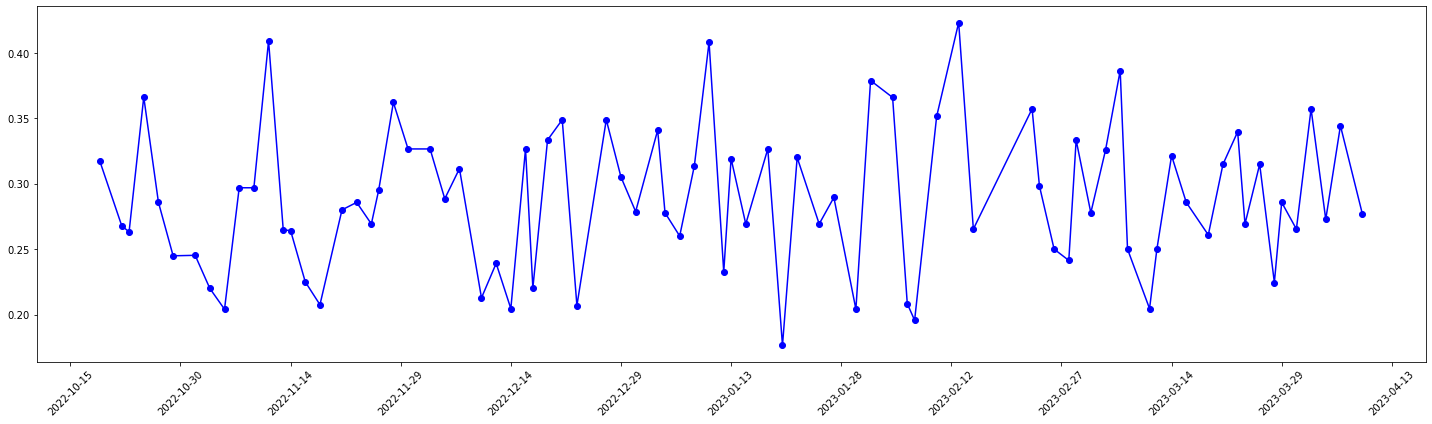

In [956]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import GradientBoostingRegressor


#rebounding_data.info()

# create a subset with only 'okc' team
okc_subset = rebounding_data[rebounding_data['team'] == 'OKC']
okc_subset = okc_subset.reset_index(drop=True)

# creating a copy to make changes onto dataframe
okc_data = okc_subset.copy()

# dropping game_number since it's not a valuable feature
okc_data = okc_data.drop('game_number', axis=1)

# converting gamedate to datetime just for visualization and maybe future use
okc_data['gamedate'] = pd.to_datetime(okc_data['gamedate'])
#okc_data

# checking to see if there's a trend between opp_team and oreb_pct to include as a feature
oreb_mean = okc_data.groupby('opp_team')['oreb_pct'].mean()
oreb_mean = oreb_mean.sort_values(ascending=False)
oreb_mean

# there is a clear trend as okc outrebounds better against certain teams and worse against others
# therefore, opp_team will be label encoded and included as a feature 
# (converting categorical to numerical)



# spltting data into train and test
train_data = okc_data.iloc[:80]  # Games 1-80
test_data = okc_data.iloc[80]    # Game 81

# create one-hot encoded features for 'opp_team' on the entire dataset
all_data = pd.get_dummies(okc_data[['offensive_rebounds', 'off_rebound_chances', 'oreb_pct', 'opp_team']], columns=['opp_team'])

# features for training
X_train = all_data.iloc[:80]
y_train = train_data['oreb_pct']

# feature for prediction (Game 81)
X_pred = all_data.iloc[80:81]  # Selecting a single row for prediction

# scaling features 'offensive_rebounds' and 'off_rebound_chances'
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train[['offensive_rebounds', 'off_rebound_chances']])

# replace original features with scaled features in the training data
X_train['offensive_rebounds'] = scaled_features[:, 0]
X_train['off_rebound_chances'] = scaled_features[:, 1]

# initialize Gradient Boosting Regressor
model = GradientBoostingRegressor()

# fit the model
model.fit(X_train, y_train)

# predict the offensive rebound percent for Game 81
predicted_oreb_pct = model.predict(X_pred)

# calculate the actual offensive rebound percentage for Game 81
actual_oreb_pct = test_data['oreb_pct']

print("Predicted Offensive Rebound Percentage for OKC's Game 81:", predicted_oreb_pct[0])
print("Actual Offensive Rebound Percentage for OKC's Game 81:", actual_oreb_pct)



# calculate Mean Squared Error
mse = mean_squared_error([actual_oreb_pct], [predicted_oreb_pct])

print("Mean Squared Error:", mse)



plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(df['gamedate'], df['oreb_pct'], marker='o', linestyle='-', color='b')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))

# Format the x-axis labels as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


<strong><span style="color:red">ANSWER 1:</span></strong>  

### 0.34% 

## Here is the model's performance for predicting offensive rebound percentage for the last 20% of the games of the season (keeping in mind that it is time-series)

In [957]:
# create one-hot encoded features for 'opp_team' on the entire dataset
all_data = pd.get_dummies(okc_data[['offensive_rebounds', 'off_rebound_chances', 'oreb_pct', 'opp_team']], columns=['opp_team'])

# scaling features 'offensive_rebounds' and 'off_rebound_chances'
scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_data[['offensive_rebounds', 'off_rebound_chances']])

# replace original features with scaled features
all_data['offensive_rebounds'] = scaled_features[:, 0]
all_data['off_rebound_chances'] = scaled_features[:, 1]

# use data towards the end for test set
train_data = all_data.iloc[:-16]  # Data except the last 16 games
test_data = all_data.iloc[-16:]   # Last 16 games

# features for training
X_train = train_data.drop('oreb_pct', axis=1)
y_train = train_data['oreb_pct']

# features for testing
X_test = test_data.drop('oreb_pct', axis=1)
y_test = test_data['oreb_pct']

# initialize Gradient Boosting Regressor
model = GradientBoostingRegressor()

# fit the model
model.fit(X_train, y_train)

# predict the offensive rebound percent on the test set
y_pred = model.predict(X_test)

# calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.00012411953383543696


### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2:</span></strong>  
### Looking at multiple game stretches. 

#### There will always be games where teams have extremely good or extremely bad offensive rebounding games (due to missing players or just outlier games). 
#### By looking at groups of 3 games at a time or a rolling average of games (3 for this dataset since it's only one season of data) or 10 games at a time (10 for datasets including multiple seasons of data), we can get a holistic picture of how okc is rebounding during a stretch of games without having to account for outlier bad rebounding games.
#### So we can add columns that take the mean of the rebounding statistics for the last 3 games (or how many every games dending on the size of the dataset). This can be done easily by implementing the following code block: 


In [958]:
def find_reb_avg(team):
    avg = team['oreb_pct'].rolling(3).mean()  # calculate rolling average 
    team['oreb_pct_avg'] = avg  # Add a new column for the rolling average
    return team

# Group by 'team' and apply the function
df1 = rebounding_data.groupby('team').apply(find_reb_avg)
df1[df1['team']=='OKC']

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct,oreb_pct_avg
19,OKC,MIN,2022-10-19,1,20,63,0.317460,NaN
63,OKC,DEN,2022-10-22,2,15,56,0.267857,NaN
81,OKC,MIN,2022-10-23,3,15,57,0.263158,0.282825
107,OKC,LAC,2022-10-25,4,26,71,0.366197,0.299071
135,OKC,LAC,2022-10-27,5,14,49,0.285714,0.305023
...,...,...,...,...,...,...,...,...
2297,OKC,IND,2023-03-31,78,13,49,0.265306,0.258503
2342,OKC,PHX,2023-04-02,79,20,56,0.357143,0.302721
2375,OKC,GSW,2023-04-04,80,15,55,0.272727,0.298392
2399,OKC,UTA,2023-04-06,81,21,61,0.344262,0.324711


### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:red">ANSWER 3:</span></strong>  
### 1. Including data regarding rebounding statistics for specific players. 
#### This will help the model understand what players are contributing highly to team rebounding statistics and what players are not. Previous method can also be implemented for this data to account for games where players have outlying high rebounding games or low rebounding games. 

### 2. Home/away game statistics. 
#### Players and teams tend to perform better at home and this will definitely affect rebounding statistics as well.

### 3. Opponent team defensive rebounding statistics
#### By adding data related to opponent teams' defensive rebounding statistics, the model can become more accurate towards correlating opponent team matchups and how OKC rebounds against them.
